# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 觀察填補缺值以及 標準化 / 最小最大化 對數值的影響

# [作業重點]
- 觀察替換不同補缺方式, 對於特徵的影響 (In[4]~In[6], Out[4]~Out[6])
- 觀察替換不同特徵縮放方式, 對於特徵的影響 (In[7]~In[8], Out[7]~Out[8])

In [13]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

%matplotlib inline

data_path = '../data/Part02/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(num_features)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [15]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
train_num = train_Y.shape[0]
df.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


# 作業1
* 試著在補空值區塊, 替換並執行兩種以上填補的缺值, 看看何者比較好?

C:\Users\m7807\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\m7807\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\m7807\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\m7807\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\m7807\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

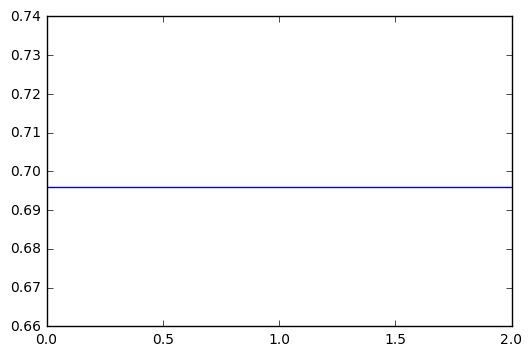

In [17]:
# 空值補 -1, 做羅吉斯迴歸
df_m1 = df.fillna(-1)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
num_m1 = cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# fill with 0
df_0 = df.fillna(0)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
num_0 = cross_val_score(estimator, train_X, train_Y, cv=5).mean()


# fill with mean
df_mn = df.fillna(df.mean())
train_X = df_m1[:train_num]
estimator = LogisticRegression()
num_mean = cross_val_score(estimator, train_X, train_Y, cv=5).mean()


plt.plot(range(3), (num_m1, num_0, num_mean))

# 作業2
* 使用不同的標準化方式 ( 原值 / 最小最大化 / 標準化 )，搭配羅吉斯迴歸模型，何者效果最好?

In [ ]:
# origin
df_m1 = df.fillna(-1)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
num_m1 = cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# minmax
df_m1 = df.fillna(-1)
df_temp = MinMaxScaler().fit_transform(df)
train_X = df_temp[:train_num]
estimator = LogisticRegression()
num_m1 = cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# stardard
df_m1 = df.fillna(-1)
df_temp = StandardScaler().fit_transform(df)
train_X = df_temp[:train_num]
estimator = LogisticRegression()
num_m1 = cross_val_score(estimator, train_X, train_Y, cv=5).mean()